<a href="https://colab.research.google.com/github/bilalahmedgb/handsonML/blob/main/Chapter_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

X_train_full = X_train_full/255.
X_test = X_test/255.

X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


4423680/4422102 [==============================] - 0s 0us/step


In [4]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
  model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))  

Epoch 1/5
1719/1719 [==============================] - 29s 15ms/step - loss: 2.0861 - accuracy: 0.2030 - val_loss: 2.6179 - val_accuracy: 0.1498
Epoch 2/5
1719/1719 [==============================] - 25s 15ms/step - loss: 1.4446 - accuracy: 0.4142 - val_loss: 2.9312 - val_accuracy: 0.2716
Epoch 3/5
1719/1719 [==============================] - 25s 15ms/step - loss: 0.9774 - accuracy: 0.5859 - val_loss: 2.1276 - val_accuracy: 0.2328
Epoch 4/5
1719/1719 [==============================] - 25s 14ms/step - loss: 1.1251 - accuracy: 0.5357 - val_loss: 2.3639 - val_accuracy: 0.3226
Epoch 5/5
1719/1719 [==============================] - 25s 15ms/step - loss: 0.8905 - accuracy: 0.6432 - val_loss: 1.9392 - val_accuracy: 0.3848


# Batch Normalization

In [ ]:
model = keras.models.Sequential([
              keras.layers.Flatten(input_shape=[28, 28]),
              keras.layers.BatchNormalization(),
              keras.layers.Dense(300, activation="relu"),
              keras.layers.BatchNormalization(),
              keras.layers.Dense(100, activation="relu"),
              keras.layers.BatchNormalization(),
              keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_101 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_102 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_103 (Dense)            (None, 10)               

In [ ]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables] 

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 10s 5ms/step - loss: 1.1978 - accuracy: 0.6090 - val_loss: 0.5573 - val_accuracy: 0.8104
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5995 - accuracy: 0.7932 - val_loss: 0.4745 - val_accuracy: 0.8398
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5193 - accuracy: 0.8187 - val_loss: 0.4425 - val_accuracy: 0.8496
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4781 - accuracy: 0.8321 - val_loss: 0.4196 - val_accuracy: 0.8554
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4559 - accuracy: 0.8389 - val_loss: 0.4045 - val_accuracy: 0.8602
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4452 - accuracy: 0.8428 - val_loss: 0.3926 - val_accuracy: 0.8626
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4246 - accuracy: 0.8511 - val_loss: 0.3829 - val_accuracy

In [ ]:
#Creating model with use_bias=False

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 10s 5ms/step - loss: 1.3101 - accuracy: 0.5696 - val_loss: 0.5867 - val_accuracy: 0.8040
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6449 - accuracy: 0.7792 - val_loss: 0.5023 - val_accuracy: 0.8316
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5698 - accuracy: 0.8052 - val_loss: 0.4625 - val_accuracy: 0.8418
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5230 - accuracy: 0.8179 - val_loss: 0.4385 - val_accuracy: 0.8498
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4918 - accuracy: 0.8300 - val_loss: 0.4205 - val_accuracy: 0.8554
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4736 - accuracy: 0.8344 - val_loss: 0.4090 - val_accuracy: 0.8600
Epoch 7/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4602 - accuracy: 0.8396 - val_loss: 0.3982 - val_accura

# Reusing Pretrained Layers

In [ ]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

In [ ]:
(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [ ]:
#type(y_train_B)

In [ ]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [ ]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28,28]))

for n_hidden in (300, 100, 50, 50, 50):
  model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [ ]:
model_A.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 4

In [ ]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [ ]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                      validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.9248 - accuracy: 0.6994 - val_loss: 0.3890 - val_accuracy: 0.8677
Epoch 2/20
1375/1375 [==============================] - 5s 3ms/step - loss: 0.3651 - accuracy: 0.8748 - val_loss: 0.3289 - val_accuracy: 0.8824
Epoch 3/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.3182 - accuracy: 0.8897 - val_loss: 0.3013 - val_accuracy: 0.8991
Epoch 4/20
1375/1375 [==============================] - 5s 3ms/step - loss: 0.3048 - accuracy: 0.8954 - val_loss: 0.2892 - val_accuracy: 0.9013
Epoch 5/20
1375/1375 [==============================] - 5s 3ms/step - loss: 0.2803 - accuracy: 0.9029 - val_loss: 0.2774 - val_accuracy: 0.9066
Epoch 6/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.2700 - accuracy: 0.9080 - val_loss: 0.2733 - val_accuracy: 0.9071
Epoch 7/20
1375/1375 [==============================] - 5s 3ms/step - loss: 0.2625 - accuracy: 0.9091 - val_loss: 0.2720 - val_accuracy:

In [ ]:
model_A.save("my_model_A.h5")

In [ ]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [ ]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 1s 40ms/step - loss: 1.0360 - accuracy: 0.4975 - val_loss: 0.6314 - val_accuracy: 0.6004
Epoch 2/20
7/7 [==============================] - 0s 16ms/step - loss: 0.5883 - accuracy: 0.6971 - val_loss: 0.4784 - val_accuracy: 0.8529
Epoch 3/20
7/7 [==============================] - 0s 16ms/step - loss: 0.4380 - accuracy: 0.8854 - val_loss: 0.4102 - val_accuracy: 0.8945
Epoch 4/20
7/7 [==============================] - 0s 16ms/step - loss: 0.4021 - accuracy: 0.8712 - val_loss: 0.3647 - val_accuracy: 0.9178
Epoch 5/20
7/7 [==============================] - 0s 16ms/step - loss: 0.3361 - accuracy: 0.9348 - val_loss: 0.3300 - val_accuracy: 0.9320
Epoch 6/20
7/7 [==============================] - 0s 18ms/step - loss: 0.3113 - accuracy: 0.9233 - val_loss: 0.3019 - val_accuracy: 0.9402
Epoch 7/20
7/7 [==============================] - 0s 17ms/step - loss: 0.2817 - accuracy: 0.9299 - val_loss: 0.2804 - val_accuracy: 0.9422
Epoch 8/20
7/7 [===========

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_104 (Dense)            (None, 300)               235200    
_________________________________________________________________
batch_normalization_4 (Batch (None, 300)               1200      
_________________________________________________________________
dense_105 (Dense)            (None, 100)               30000     
_________________________________________________________________
batch_normalization_5 (Batch (None, 100)               400       
_________________________________________________________________
dense_106 (Dense)            (None, 10)               

In [ ]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model_A.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_107 (Dense)            (None, 300)               235500    
_________________________________________________________________
dense_108 (Dense)            (None, 100)               30100     
_________________________________________________________________
dense_109 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_110 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_111 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_112 (Dense)            (None, 8)                

In [ ]:
model_B_on_A.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_107 (Dense)            (None, 300)               235500    
_________________________________________________________________
dense_108 (Dense)            (None, 100)               30100     
_________________________________________________________________
dense_109 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_110 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_111 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_120 (Dense)            (None, 1)                

In [ ]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [ ]:
for layer in model_B_on_A.layers[:-1]:
  layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

In [ ]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 38ms/step - loss: 0.4701 - accuracy: 0.8218 - val_loss: 0.4436 - val_accuracy: 0.8174
Epoch 2/4
7/7 [==============================] - 0s 15ms/step - loss: 0.4001 - accuracy: 0.8649 - val_loss: 0.4145 - val_accuracy: 0.8306
Epoch 3/4
7/7 [==============================] - 0s 16ms/step - loss: 0.4021 - accuracy: 0.8326 - val_loss: 0.3880 - val_accuracy: 0.8458
Epoch 4/4
7/7 [==============================] - 0s 15ms/step - loss: 0.3533 - accuracy: 0.8887 - val_loss: 0.3650 - val_accuracy: 0.8529
Epoch 1/16
7/7 [==============================] - 1s 40ms/step - loss: 0.3287 - accuracy: 0.9006 - val_loss: 0.2487 - val_accuracy: 0.9523
Epoch 2/16
7/7 [==============================] - 0s 16ms/step - loss: 0.2008 - accuracy: 0.9877 - val_loss: 0.1968 - val_accuracy: 0.9797
Epoch 3/16
7/7 [==============================] - 0s 16ms/step - loss: 0.1694 - accuracy: 0.9931 - val_loss: 0.1655 - val_accuracy: 0.9899
Epoch 4/16
7/7 [===============

In [ ]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.1408 - accuracy: 0.9705


[0.14084088802337646, 0.9704999923706055]

In [ ]:
model_B_on_A.evaluate(X_test_B, y_test_B)

NameError: ignored

# Learning Rate Scheduling

In [ ]:
# Power Scheduling

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

In [ ]:
model = keras.models.Sequential([
              keras.layers.Flatten(input_shape=[28, 28]),
              keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
              keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
              keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
n_epochs=25

history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6037 - accuracy: 0.7890 - val_loss: 0.4025 - val_accuracy: 0.8598
Epoch 2/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3882 - accuracy: 0.8625 - val_loss: 0.3720 - val_accuracy: 0.8718
Epoch 3/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3530 - accuracy: 0.8766 - val_loss: 0.3705 - val_accuracy: 0.8698
Epoch 4/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3318 - accuracy: 0.8814 - val_loss: 0.3479 - val_accuracy: 0.8784
Epoch 5/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3208 - accuracy: 0.8854 - val_loss: 0.3420 - val_accuracy: 0.8770
Epoch 6/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2956 - accuracy: 0.8943 - val_loss: 0.3404 - val_accuracy: 0.8826
Epoch 7/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2909 - accuracy: 0.8972 - val_loss: 0.3348 - val_accuracy:

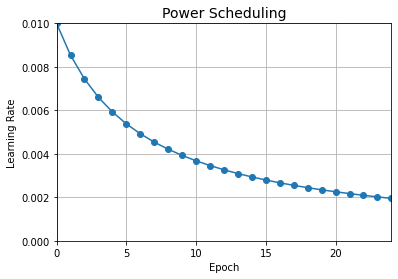

In [ ]:
learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs, "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
# Exponential Scheduling

In [ ]:
def exponential_decay_fn(epoch):
  return 0.01 * 0.1**(epoch/20)

In [ ]:
def exponential_decay(lr0, s):
  def exponential_decay_fn(epoch):
    return lr0 * 0.1**(epoch / s)
  return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [ ]:
model = keras.models.Sequential([
                    keras.layers.Flatten(input_shape=[28, 28]),
                    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
                    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
                    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [ ]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 12s 7ms/step - loss: 1.0979 - accuracy: 0.7331 - val_loss: 0.9395 - val_accuracy: 0.6994
Epoch 2/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.8030 - accuracy: 0.7674 - val_loss: 0.6111 - val_accuracy: 0.8294
Epoch 3/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.6610 - accuracy: 0.8077 - val_loss: 0.7778 - val_accuracy: 0.7658
Epoch 4/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.6482 - accuracy: 0.8182 - val_loss: 0.5523 - val_accuracy: 0.8358
Epoch 5/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5417 - accuracy: 0.8346 - val_loss: 0.5322 - val_accuracy: 0.8516
Epoch 6/25
1719/1719 [==============================] - 11s 7ms/step - loss: 0.5190 - accuracy: 0.8504 - val_loss: 0.5443 - val_accuracy: 0.8674
Epoch 7/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4439 - accuracy: 0.8687 - val_loss: 0.5361 - val_ac

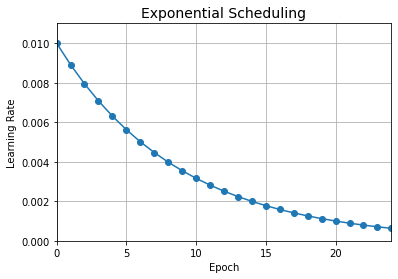

In [ ]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs-1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

# Deep Learning on CIFAR10

In [11]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
import os

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
  model.add(keras.layers.Dense(100, 
                               activation="elu",
                               kernel_initializer="he_normal"))

In [8]:
model.add(keras.layers.Dense(10, activation="softmax"))

In [9]:
optimizer = keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [10]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

170500096/170498071 [==============================] - 3s 0us/step


In [13]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5", save_best_only=True)
run_index = 1
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [14]:
model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 23s 14ms/step - loss: 9.8803 - accuracy: 0.1323 - val_loss: 2.1512 - val_accuracy: 0.2278
Epoch 2/100
1407/1407 [==============================] - 19s 13ms/step - loss: 2.0979 - accuracy: 0.2324 - val_loss: 2.0026 - val_accuracy: 0.2490
Epoch 3/100
1407/1407 [==============================] - 19s 14ms/step - loss: 1.9602 - accuracy: 0.2819 - val_loss: 1.9251 - val_accuracy: 0.2912
Epoch 4/100
1407/1407 [==============================] - 19s 14ms/step - loss: 1.8670 - accuracy: 0.3167 - val_loss: 1.8850 - val_accuracy: 0.3184
Epoch 5/100
1407/1407 [==============================] - 19s 14ms/step - loss: 1.8039 - accuracy: 0.3459 - val_loss: 1.7782 - val_accuracy: 0.3392
Epoch 6/100
1407/1407 [==============================] - 19s 14ms/step - loss: 1.7543 - accuracy: 0.3632 - val_loss: 1.7527 - val_accuracy: 0.3582
Epoch 7/100
1407/1407 [==============================] - 19s 14ms/step - loss: 1.7117 - accuracy: 0.3805 - val_loss: 1

In [15]:
model = keras.models.load_model("my_cifar10_model.h5")
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 1s 3ms/step - loss: 1.5009 - accuracy: 0.4708


[1.5009092092514038, 0.4708000123500824]

In [16]:
#Model with Batch Normalization

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())

for _ in range(20):
  model.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Activation("elu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer=keras.optimizers.SGD(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_bn_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_bn_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_bn_model.h5")
model.evaluate(X_valid, y_valid)

Epoch 1/100
1407/1407 [==============================] - 24s 13ms/step - loss: 2.4808 - accuracy: 0.1542 - val_loss: 2.0323 - val_accuracy: 0.2758
Epoch 2/100
1407/1407 [==============================] - 17s 12ms/step - loss: 2.0381 - accuracy: 0.2684 - val_loss: 1.8728 - val_accuracy: 0.3278
Epoch 3/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.9293 - accuracy: 0.3097 - val_loss: 1.7987 - val_accuracy: 0.3596
Epoch 4/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.8618 - accuracy: 0.3347 - val_loss: 1.7535 - val_accuracy: 0.3744
Epoch 5/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.8101 - accuracy: 0.3512 - val_loss: 1.7207 - val_accuracy: 0.3850
Epoch 6/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.7831 - accuracy: 0.3617 - val_loss: 1.6958 - val_accuracy: 0.3938
Epoch 7/100
1407/1407 [==============================] - 18s 12ms/step - loss: 1.7668 - accuracy: 0.3662 - val_loss: 1

[1.4181780815124512, 0.5027999877929688]